# Data and Cluster Analysis on Happiness & E-Commerce

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram, linkage

# World Happiness

In [ ]:
happiness_df=pd.read_csv(r"C:\Users\student\Desktop\World Happiness Report.csv")
happiness_df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


1. Univariate Analysis:

   a. Compute and visualize histograms, boxplots, and KDE plots for Happiness Score, GDP per capita, and Freedom. (Since it is univariate analysis perform it for each features individually)

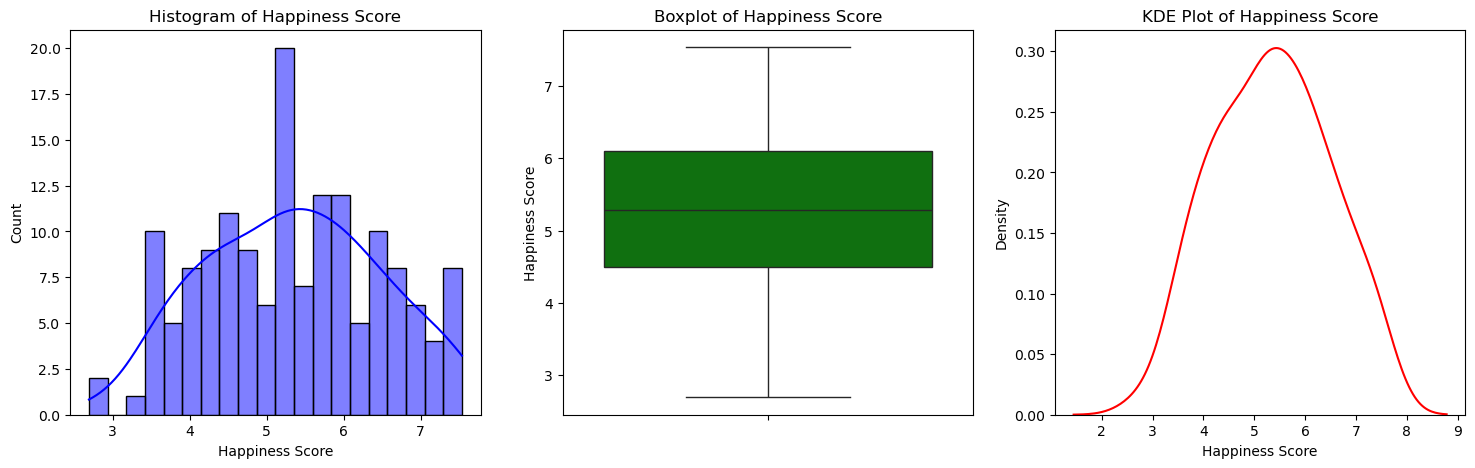

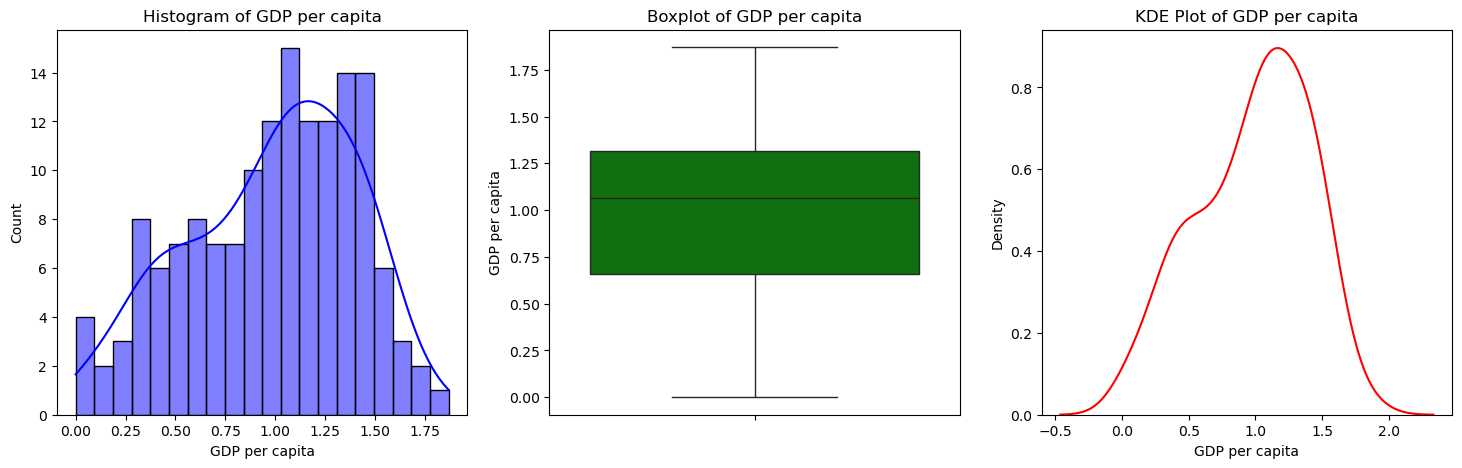

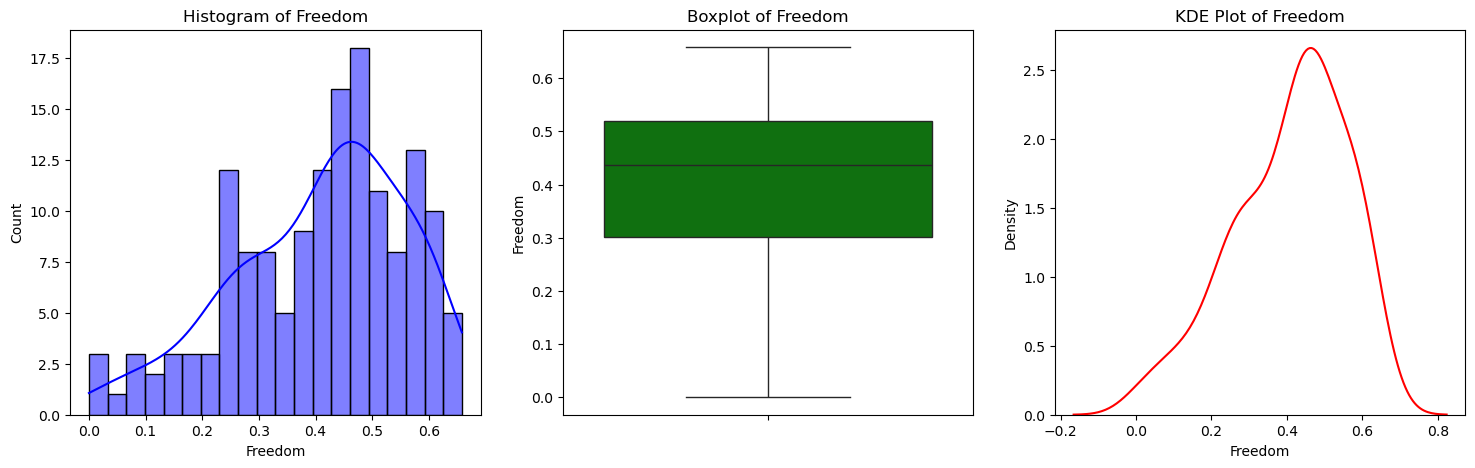

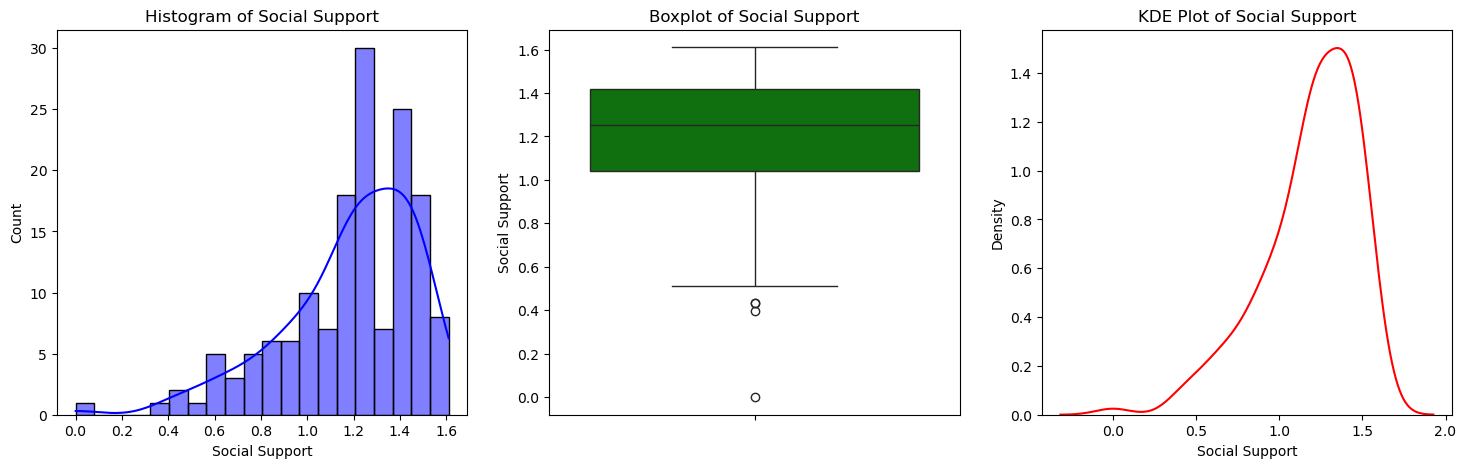

In [ ]:
happiness_df.rename(columns={'Economy': 'GDP per capita', 'Family': 'Social Support'}, inplace=True)

selected_features = ["Happiness Score", "GDP per capita", "Freedom", "Social Support"]

for feature in selected_features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(happiness_df[feature], kde=True, ax=axes[0], bins=20, color="blue")
    axes[0].set_title(f'Histogram of {feature}')

    sns.boxplot(y=happiness_df[feature], ax=axes[1], color="green")
    axes[1].set_title(f'Boxplot of {feature}')

    sns.kdeplot(happiness_df[feature], ax=axes[2], color="red")
    axes[2].set_title(f'KDE Plot of {feature}')

    plt.show()

b. Display summary statistics (mean, median, variance, skewness, kurtosis).

In [ ]:
summary_stats = happiness_df[selected_features].describe().T
summary_stats["Variance"] = happiness_df[selected_features].var()
summary_stats["Skewness"] = happiness_df[selected_features].skew()
summary_stats["Kurtosis"] = happiness_df[selected_features].kurt()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
                  count      mean       std    min       25%       50%  \
Happiness Score  153.0  5.349281  1.134997  2.693  4.497000  5.279000   
GDP per capita   153.0  0.982433  0.421901  0.000  0.659517  1.064578   
Freedom          153.0  0.408489  0.150744  0.000  0.300741  0.437454   
Social Support   153.0  1.186630  0.288441  0.000  1.041990  1.251826   

                      75%       max  Variance  Skewness  Kurtosis  
Happiness Score  6.098000  7.537000  1.288219  0.016906 -0.755792  
GDP per capita   1.315175  1.870766  0.178000 -0.384269 -0.687759  
Freedom          0.518631  0.658249  0.022724 -0.610104 -0.233064  
Social Support   1.416404  1.610574  0.083198 -1.161387  1.481827  


2. Bivariate Analysis:

    a. Scatter plot: Happiness Score vs GDP per capita.

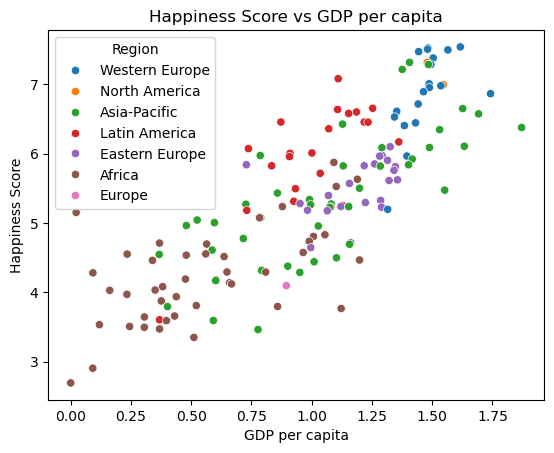

In [ ]:
sns.scatterplot(x=happiness_df["GDP per capita"], y=happiness_df["Happiness Score"], hue=happiness_df["Region"])
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs GDP per capita")
plt.show()

b. Correlation heatmap for selected features (Happiness Score, GDP per capita, Social Support, Freedom).

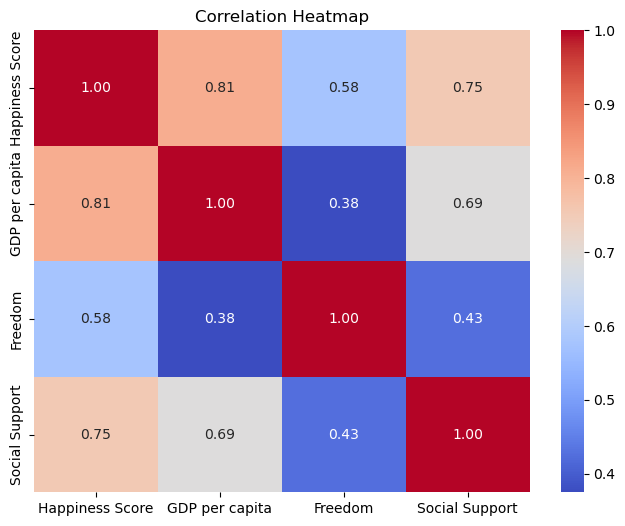

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(happiness_df[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

c. Violin plot to compare Happiness Score across regions.

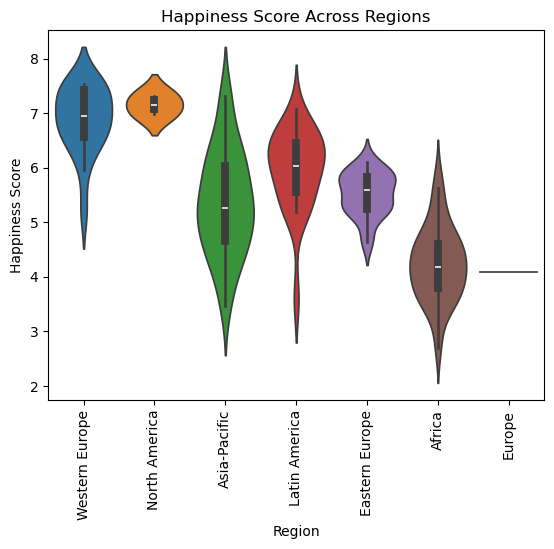

In [ ]:
sns.violinplot(x=happiness_df["Region"], y=happiness_df["Happiness Score"], hue=happiness_df["Region"])
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=90)
plt.title("Happiness Score Across Regions")
plt.show()

3.Multivariate Visualization:

    a. Create a pair plot for Happiness Score, GDP per capita, Freedom, and Social Support.

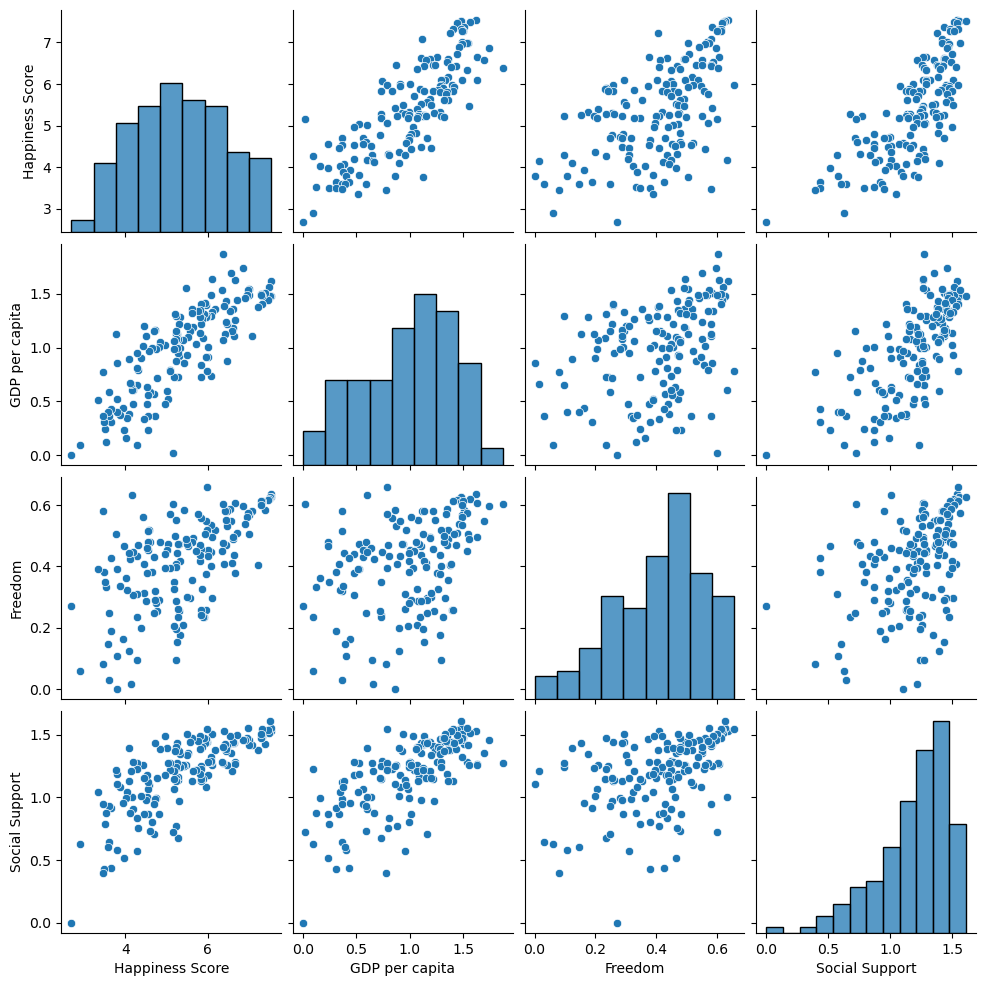

In [ ]:
sns.pairplot(happiness_df[selected_features])
plt.show()

b. Use a 3D scatter plot (GDP per capita, Freedom, Happiness Score) to analyze relationships.

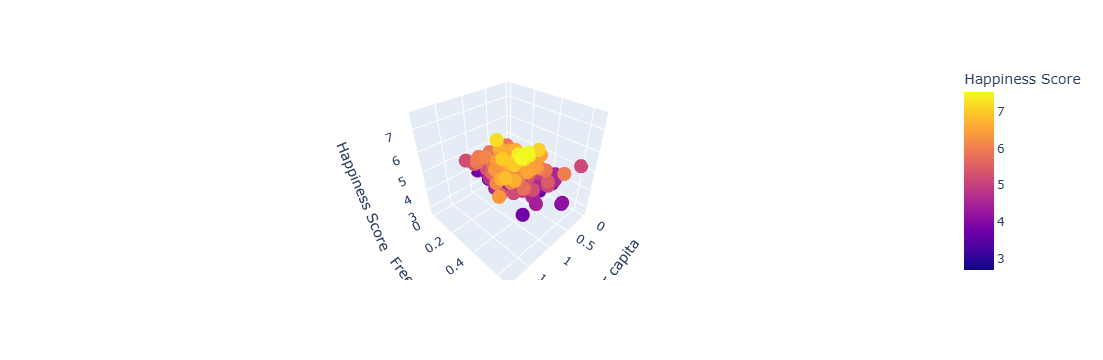

In [ ]:
fig = px.scatter_3d(happiness_df, x="GDP per capita", y="Freedom", z="Happiness Score", color="Happiness Score")
fig.show()

4. Regression Analysis:
a. Predict Happiness Score using GDP per capita and Freedom.

b. Train a simple linear regression model (Happiness Score ~ GDP per capita).

d. Visualize the regression line on a scatter plot.

e. Evaluate model performance using R² score and RMSE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

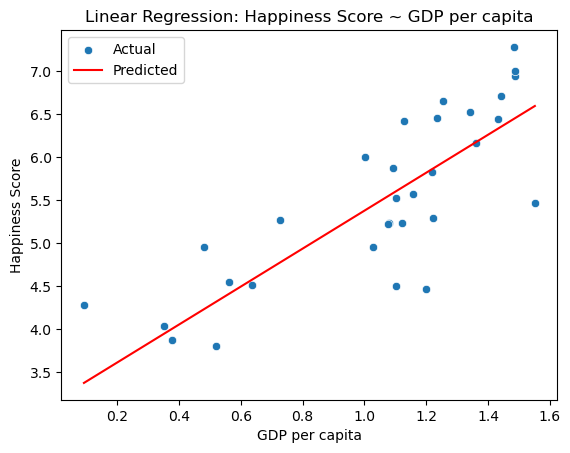


Regression Model Performance:
R² Score: 0.7009799846160523
RMSE: 0.5288578155804289


In [ ]:
X = happiness_df[["GDP per capita", "Freedom"]]
y = happiness_df["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

X_simple = happiness_df[["GDP per capita"]]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

sns.scatterplot(x=X_test["GDP per capita"], y=y_test, label="Actual")
sns.lineplot(x=X_test["GDP per capita"], y=y_pred_simple, color="red", label="Predicted")
plt.title("Linear Regression: Happiness Score ~ GDP per capita")
plt.show()

print("\nRegression Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

c. Extend it to multiple linear regression (Happiness Score ~ GDP per capita + Freedom).

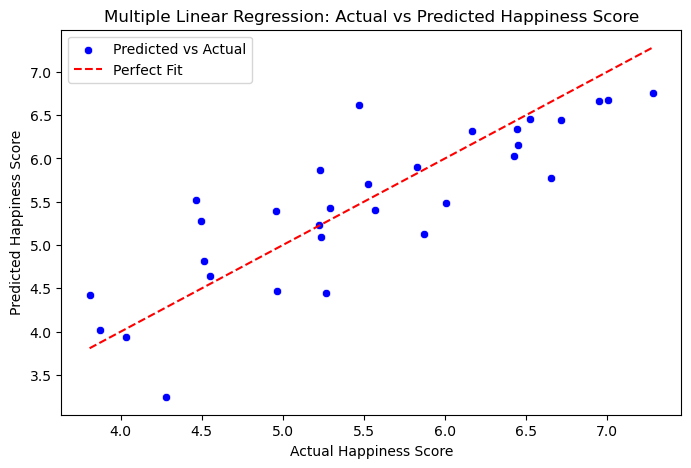


Multiple Linear Regression Model Performance:
R² Score: 0.7010
RMSE: 0.5289


In [ ]:
X = happiness_df[["GDP per capita", "Freedom"]]
y = happiness_df["Happiness Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Multiple Linear Regression: Actual vs Predicted Happiness Score")
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nMultiple Linear Regression Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# E-Commerce Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E-commerceCustomerBehavior-Sheet1.csv to E-commerceCustomerBehavior-Sheet1.csv


In [ ]:
ecommerce_file = "E-commerceCustomerBehavior-Sheet1.csv"
df = pd.read_csv(ecommerce_file)
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


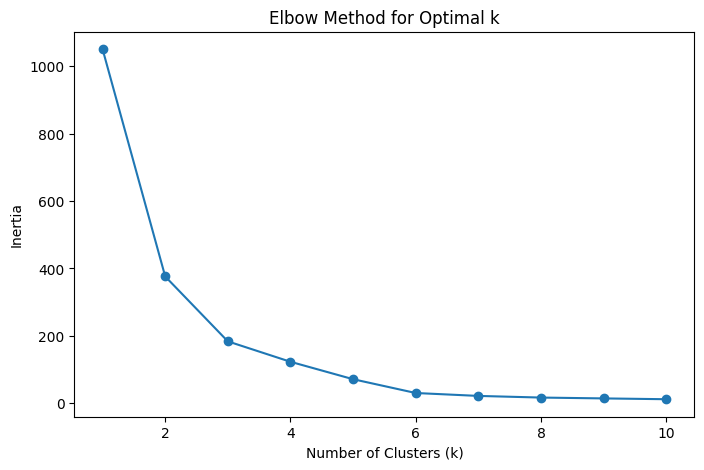

In [ ]:
# Selecting relevant features
features = df[['Age', 'Total Spend', 'Items Purchased']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Finding optimal clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

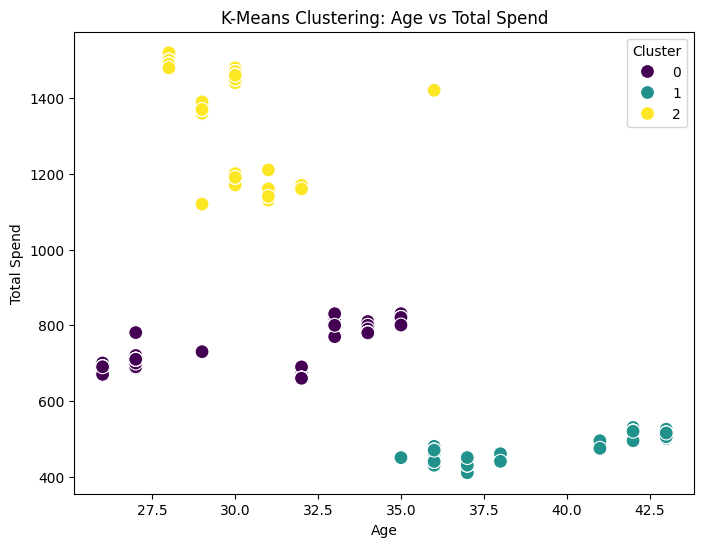

In [ ]:
# Performing K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# 2D Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Total Spend'], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.title('K-Means Clustering: Age vs Total Spend')
plt.legend(title="Cluster")
plt.show()

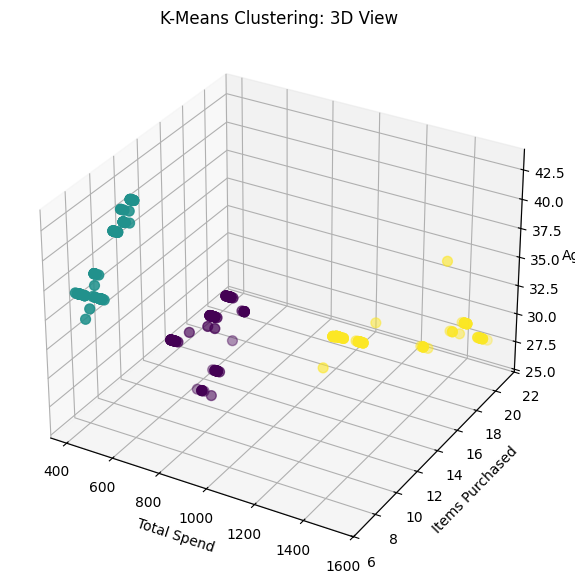

In [ ]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Total Spend'], df['Items Purchased'], df['Age'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Total Spend')
ax.set_ylabel('Items Purchased')
ax.set_zlabel('Age')
ax.set_title('K-Means Clustering: 3D View')
plt.show()


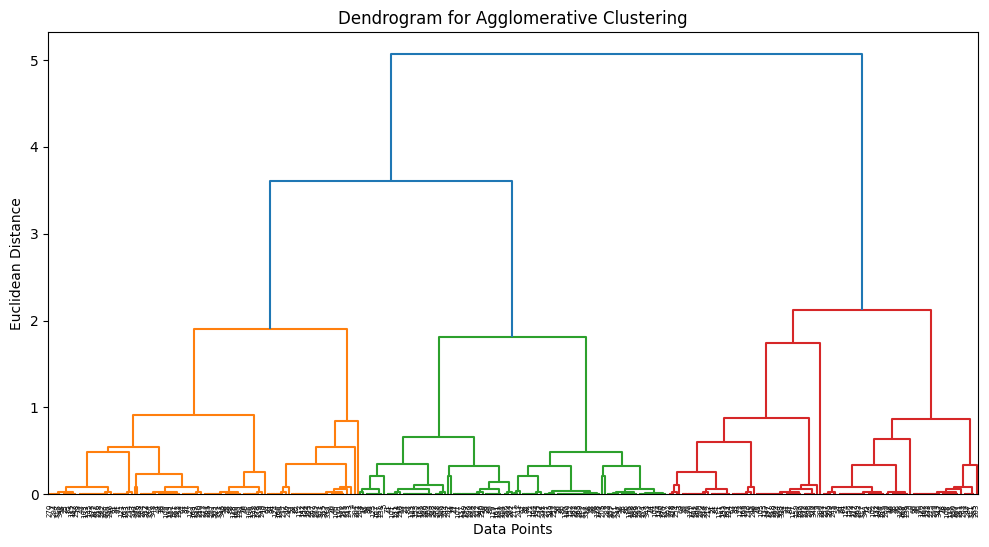

In [ ]:
# Agglomerative Clustering with Complete Linkage
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='complete')
df['Agglo_Cluster'] = agglo.fit_predict(scaled_features)

# Dendrogram
linked = linkage(scaled_features, method='complete')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


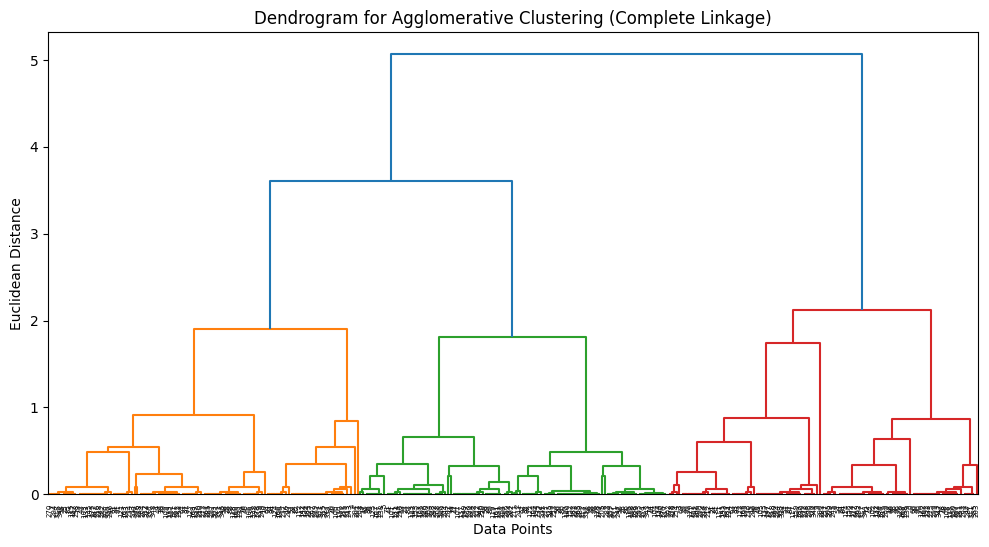

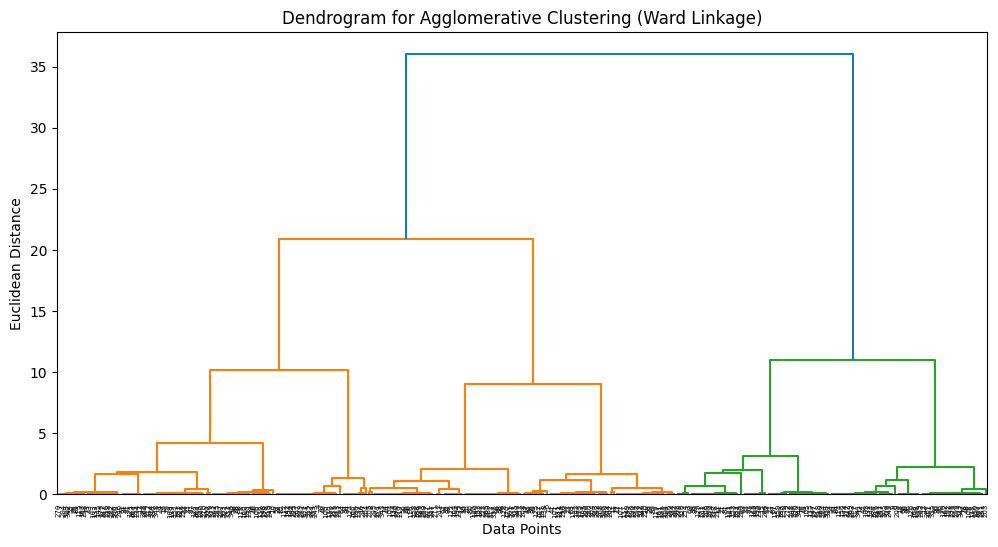

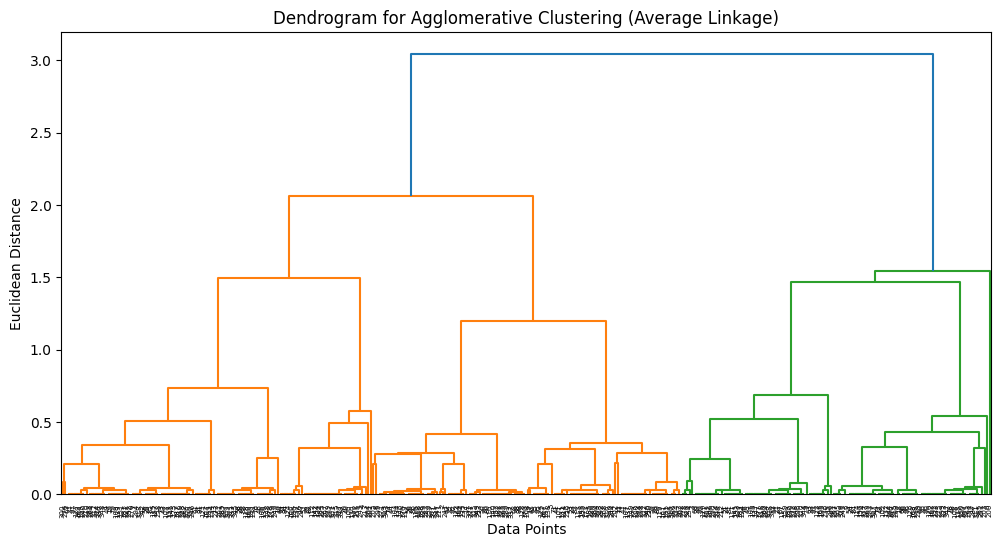

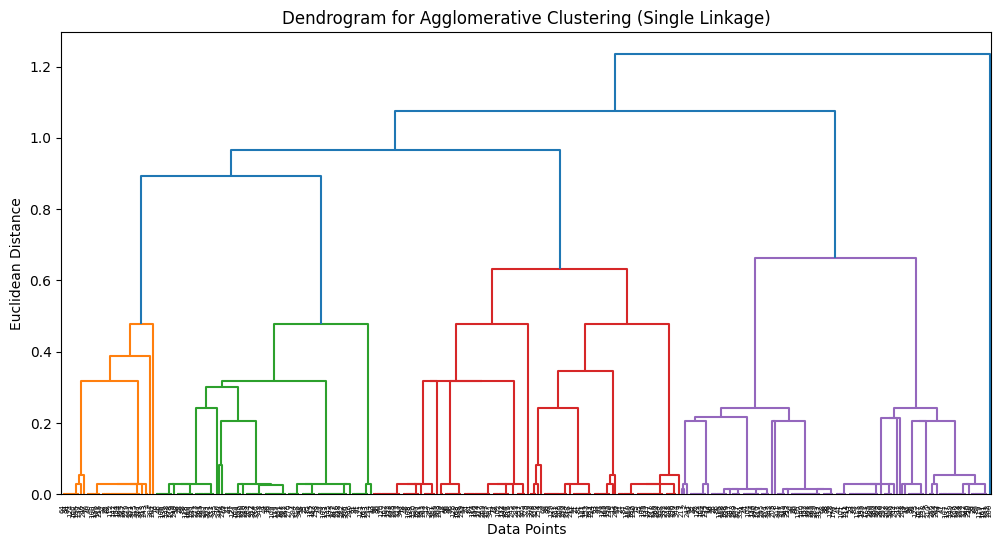

In [ ]:
# Agglomerative Clustering with Different Linkages
linkage_methods = ['complete', 'ward', 'average', 'single']
for method in linkage_methods:
    agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    df[f'Agglo_Cluster_{method}'] = agglo.fit_predict(scaled_features)

    # Dendrogram
    linked = linkage(scaled_features, method=method)
    plt.figure(figsize=(12, 6))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f"Dendrogram for Agglomerative Clustering ({method.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    plt.show()

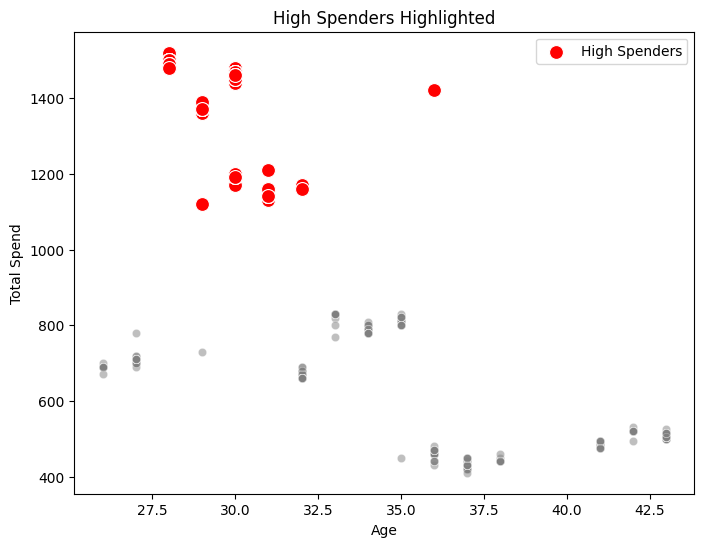

In [ ]:
# Data Brushing: Highlighting High Spenders
def highlight_high_spenders(df, threshold):
    high_spenders = df[df['Total Spend'] > threshold]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Age'], y=df['Total Spend'], color='gray', alpha=0.5)
    sns.scatterplot(x=high_spenders['Age'], y=high_spenders['Total Spend'], color='red', s=100, label='High Spenders')
    plt.xlabel('Age')
    plt.ylabel('Total Spend')
    plt.title('High Spenders Highlighted')
    plt.legend()
    plt.show()

highlight_high_spenders(df, threshold=1000)

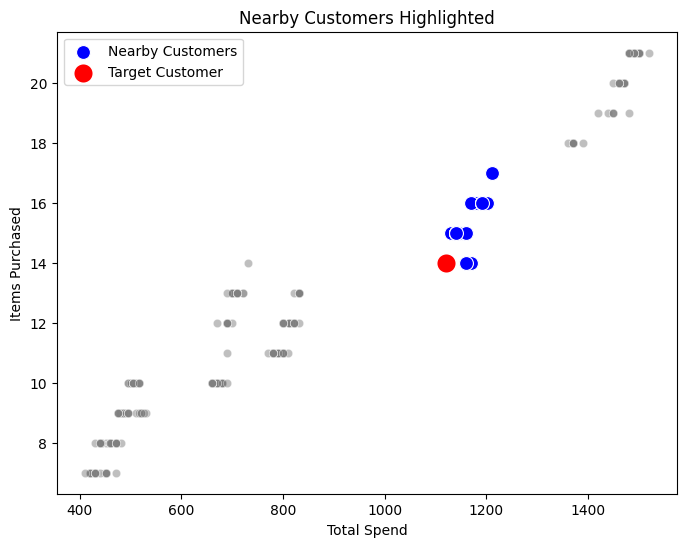

In [ ]:
# Nearness Selection
def select_nearby_customers(df, target_customer_id, distance_threshold):
    target = df[df['Customer ID'] == target_customer_id][['Total Spend', 'Items Purchased']].values[0]
    df['Distance'] = df.apply(lambda row: euclidean(target, [row['Total Spend'], row['Items Purchased']]), axis=1)
    nearby_customers = df[df['Distance'] <= distance_threshold]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Total Spend'], y=df['Items Purchased'], color='gray', alpha=0.5)
    sns.scatterplot(x=nearby_customers['Total Spend'], y=nearby_customers['Items Purchased'], color='blue', s=100, label='Nearby Customers')
    sns.scatterplot(x=[target[0]], y=[target[1]], color='red', s=200, label='Target Customer')
    plt.xlabel('Total Spend')
    plt.ylabel('Items Purchased')
    plt.title('Nearby Customers Highlighted')
    plt.legend()
    plt.show()

select_nearby_customers(df, target_customer_id=101, distance_threshold=200)

In [ ]:
# Sorting & Rearranging
def sort_customers(df, sort_by, ascending=True):
    sorted_df = df.sort_values(by=sort_by, ascending=ascending)
    return sorted_df[['Customer ID', 'Age', 'Total Spend', 'Items Purchased']]

print(sort_customers(df, 'Total Spend', ascending=False).head())


     Customer ID  Age  Total Spend  Items Purchased
9            110   28       1520.1               21
117          218   28       1500.1               21
87           188   28       1500.1               21
159          260   28       1500.1               21
189          290   28       1500.1               21
